<a href="https://colab.research.google.com/github/Shefali2512/Codec_Technologies_Tasks/blob/main/Employee_Attrition_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

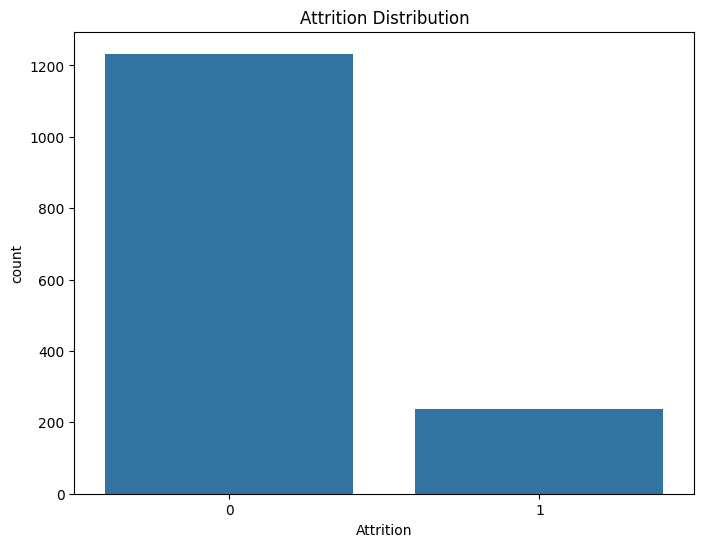

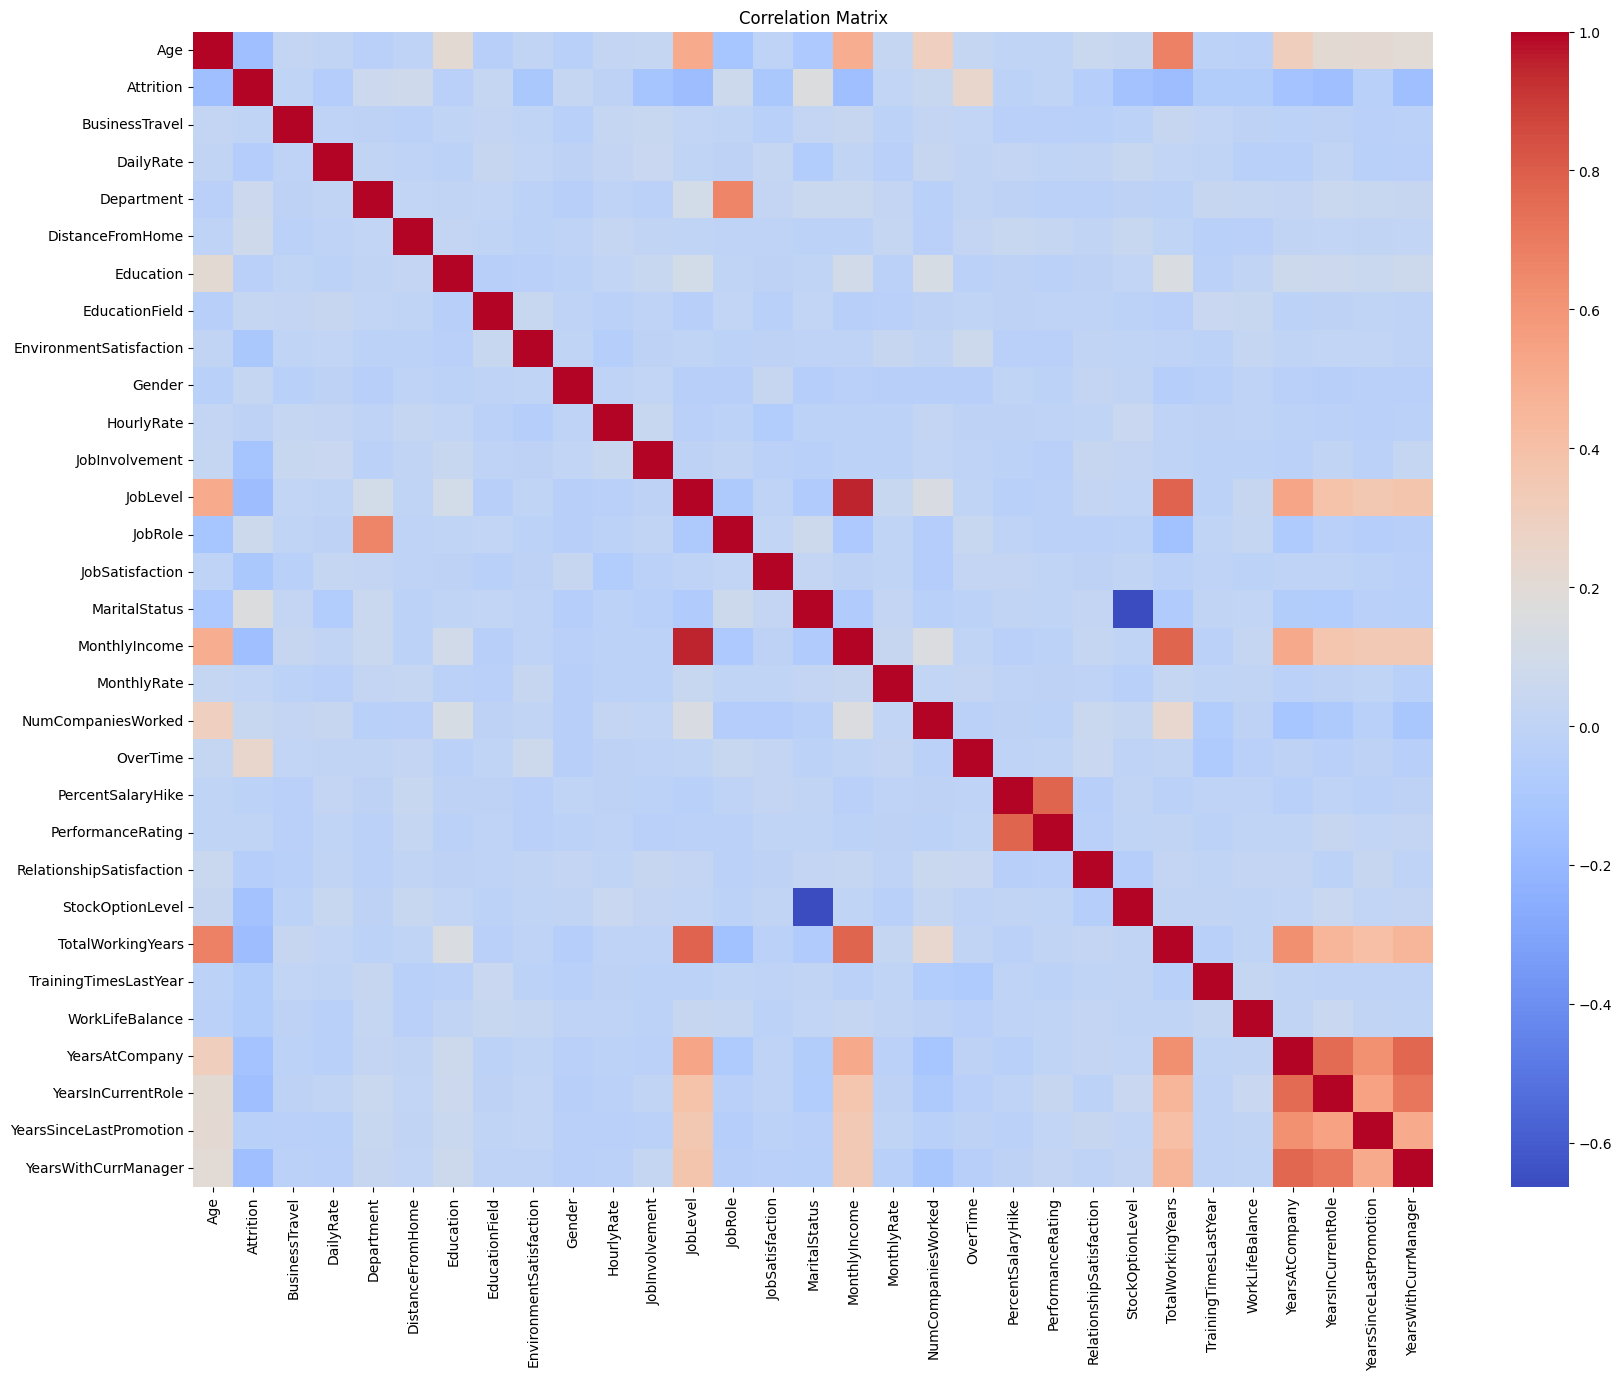

Evaluation for Random Forest:
Accuracy: 0.8390022675736961
ROC AUC: 0.5900560828300259

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       380
           1       0.38      0.25      0.30        61

    accuracy                           0.84       441
   macro avg       0.63      0.59      0.60       441
weighted avg       0.81      0.84      0.82       441


Confusion Matrix:
[[355  25]
 [ 46  15]]


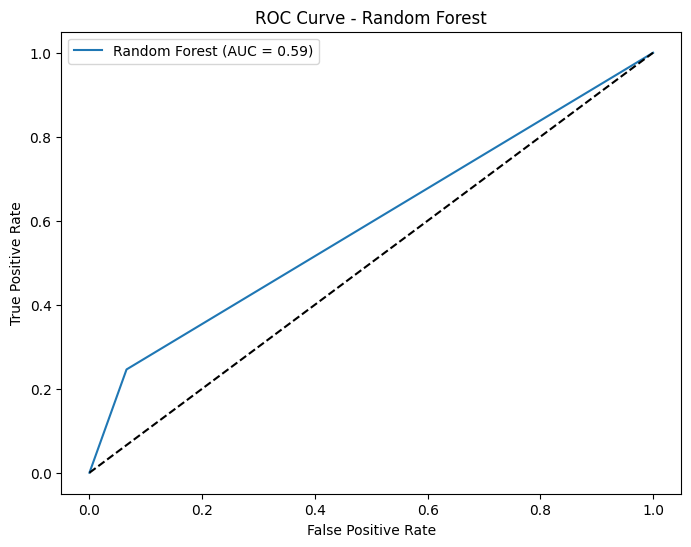

Evaluation for Logistic Regression:
Accuracy: 0.8299319727891157
ROC AUC: 0.6398403796376186

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       380
           1       0.38      0.38      0.38        61

    accuracy                           0.83       441
   macro avg       0.64      0.64      0.64       441
weighted avg       0.83      0.83      0.83       441


Confusion Matrix:
[[343  37]
 [ 38  23]]


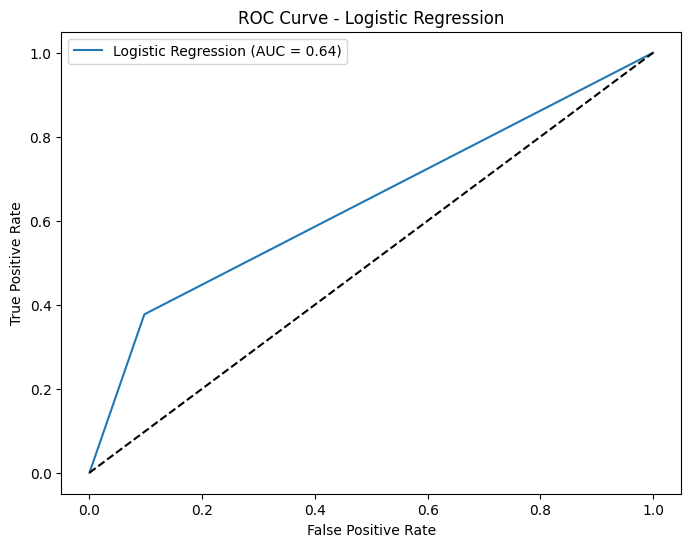

Evaluation for XGBoost:
Accuracy: 0.8458049886621315
ROC AUC: 0.6284081104400345

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       380
           1       0.43      0.33      0.37        61

    accuracy                           0.85       441
   macro avg       0.66      0.63      0.64       441
weighted avg       0.83      0.85      0.84       441


Confusion Matrix:
[[353  27]
 [ 41  20]]


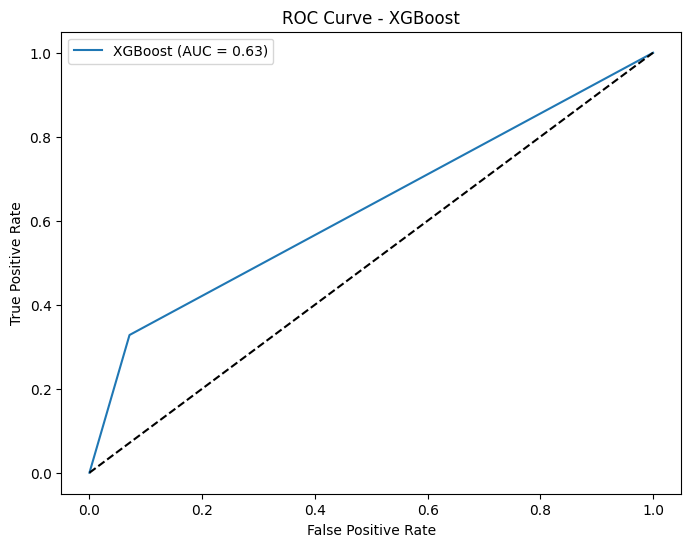

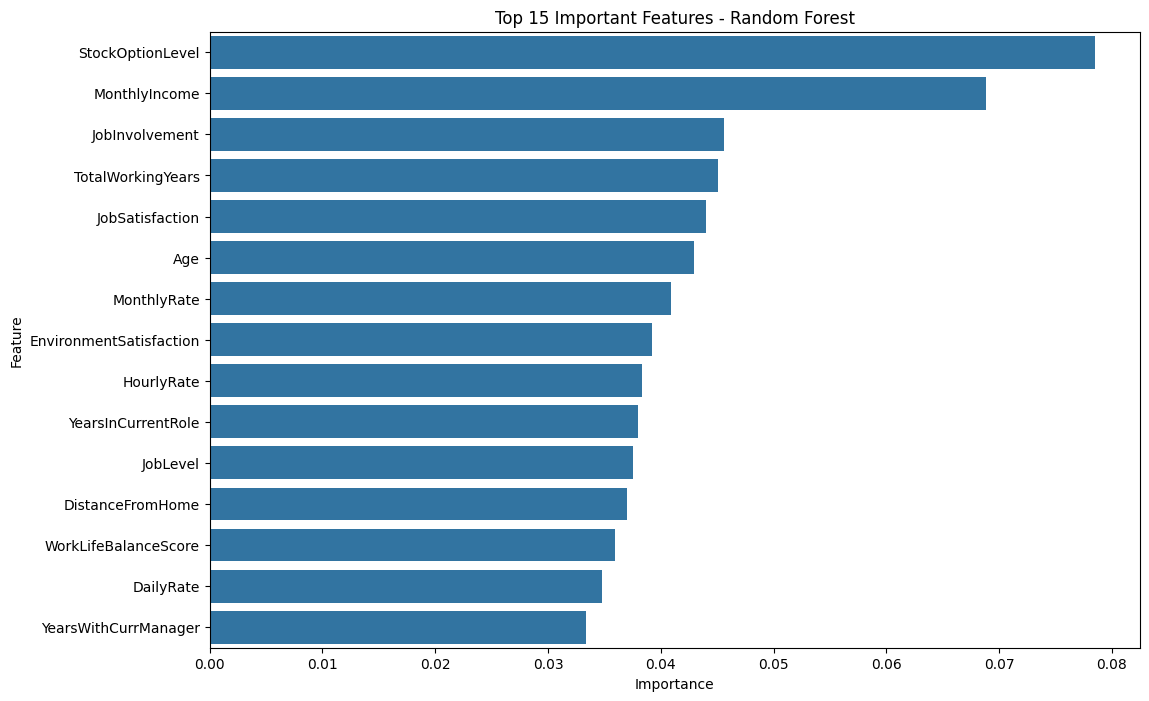

Model saved as 'best_attrition_model.pkl'


In [19]:
# Employee Attrition Analysis
# Install required packages (run once)
!pip install pandas numpy matplotlib seaborn scikit-learn imbalanced-learn xgboost plotly

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
url = "https://raw.githubusercontent.com/IBM/employee-attrition-aif360/master/data/emp_attrition.csv"
df = pd.read_csv(url)

# Data Cleaning

df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)

# Handle missing values if any
df.fillna(method='ffill', inplace=True)

# Convert categorical variables to numerical
cat_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Exploratory Data Analysis (EDA)
# Attrition distribution
plt.figure(figsize=(8,6))
sns.countplot(x='Attrition', data=df)
plt.title('Attrition Distribution')
plt.show()

# Correlation matrix
plt.figure(figsize=(20,15))
corr = df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Interactive EDA with Plotly
fig = px.pie(df, names='Attrition', title='Attrition Percentage')
fig.show()

# Age vs Attrition
fig = px.box(df, x='Attrition', y='Age', color='Attrition',
             title='Age Distribution by Attrition Status')
fig.show()

# Department wise attrition
fig = px.histogram(df, x='Department', color='Attrition', barmode='group',
                  title='Attrition by Department')
fig.show()

# Monthly Income vs Attrition
fig = px.box(df, x='Attrition', y='MonthlyIncome', color='Attrition',
            title='Monthly Income Distribution by Attrition Status')
fig.show()

# Feature Engineering
# Create new features if needed
df['WorkLifeBalanceScore'] = df['WorkLifeBalance'] * df['JobSatisfaction']
df['TotalSatisfaction'] = df['EnvironmentSatisfaction'] + df['JobSatisfaction'] + df['RelationshipSatisfaction']

# Prepare data for modeling
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Model Building
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train_smote)
y_pred_rf = rf.predict(X_test_scaled)

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train_smote)
y_pred_lr = lr.predict(X_test_scaled)

# XGBoost
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train_scaled, y_train_smote)
y_pred_xgb = xgb.predict(X_test_scaled)

# Model Evaluation
def evaluate_model(y_true, y_pred, model_name):
    print(f"Evaluation for {model_name}:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("ROC AUC:", roc_auc_score(y_true, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_true, y_pred))

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_true, y_pred):.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend()
    plt.show()

# Evaluate all models
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_xgb, "XGBoost")

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
plt.title('Top 15 Important Features - Random Forest')
plt.show()


# Create a summary dataframe for dashboard
summary_df = df.groupby('Attrition').agg({
    'Age': 'mean',
    'MonthlyIncome': 'mean',
    'JobSatisfaction': 'mean',
    'YearsAtCompany': 'mean'
}).reset_index()

# Convert Attrition back to categorical
summary_df['Attrition'] = summary_df['Attrition'].map({0: 'No', 1: 'Yes'})

# Create interactive dashboard
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{'type': 'bar'}, {'type': 'bar'}],
           [{'type': 'bar'}, {'type': 'bar'}]],
    subplot_titles=("Average Age", "Average Monthly Income",
                    "Average Job Satisfaction", "Average Years at Company")
)

fig.add_trace(
    go.Bar(x=summary_df['Attrition'], y=summary_df['Age'], name='Age'),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=summary_df['Attrition'], y=summary_df['MonthlyIncome'], name='Monthly Income'),
    row=1, col=2
)

fig.add_trace(
    go.Bar(x=summary_df['Attrition'], y=summary_df['JobSatisfaction'], name='Job Satisfaction'),
    row=2, col=1
)

fig.add_trace(
    go.Bar(x=summary_df['Attrition'], y=summary_df['YearsAtCompany'], name='Years at Company'),
    row=2, col=2
)

fig.update_layout(
    title_text="Employee Attrition Key Metrics",
    height=600,
    showlegend=False
)

fig.show()

# Save the best model
import joblib
joblib.dump(rf, 'best_attrition_model.pkl')
print("Model saved as 'best_attrition_model.pkl'")